In [1]:
#Importing the dataset
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/91976/Downloads/delivery_time.csv")

In [3]:
#EDA
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [12]:
#changing tha columns name
data.columns = ['Delivery_Time', 'Sorting_Time']

In [13]:
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
data.shape

(21, 2)

In [15]:
data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [17]:
data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

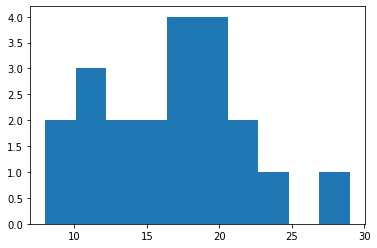

In [18]:
import matplotlib.pyplot as plt
plt.hist(data.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x17c5ec89190>,
 'caps': [<matplotlib.lines.Line2D at 0x17c5ec89850>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c5ec7adf0>],
 'medians': [<matplotlib.lines.Line2D at 0x17c5ec89f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c5ec942b0>],
 'means': []}

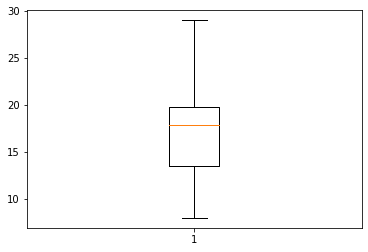

In [20]:
plt.boxplot(data.Delivery_Time)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

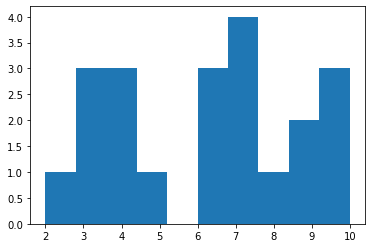

In [22]:
plt.hist(data.Sorting_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x17c5edc0460>,
 'caps': [<matplotlib.lines.Line2D at 0x17c5edc0b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x17c5edc0100>],
 'medians': [<matplotlib.lines.Line2D at 0x17c5edca220>],
 'fliers': [<matplotlib.lines.Line2D at 0x17c5edca580>],
 'means': []}

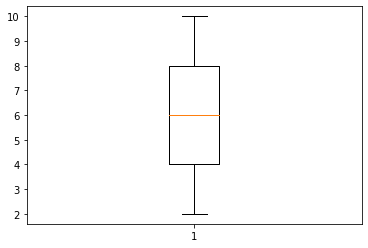

In [23]:
plt.boxplot(data.Sorting_Time)

Text(0, 0.5, 'Delivery Time')

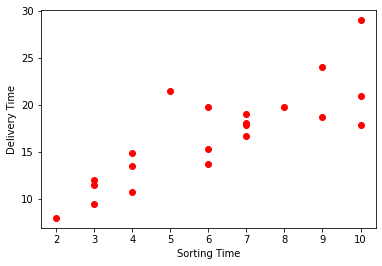

In [26]:
plt.plot(data.Sorting_Time, data.Delivery_Time, "ro")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

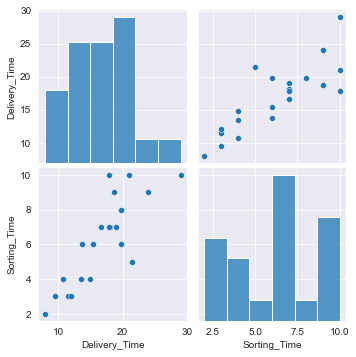

In [27]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

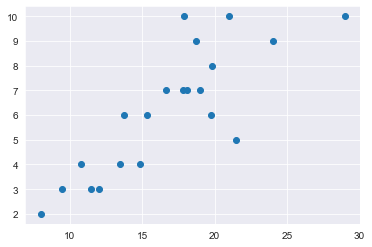

In [28]:
plt.scatter(data.Delivery_Time, data.Sorting_Time)

In [29]:
#Correlation
data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery_Time', ylabel='Count'>

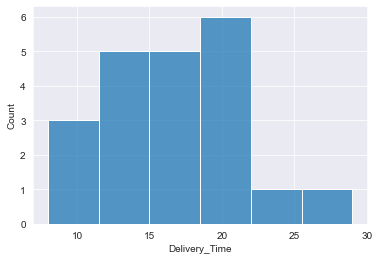

In [30]:
sns.histplot(data.Delivery_Time)

<AxesSubplot:xlabel='Sorting_Time', ylabel='Count'>

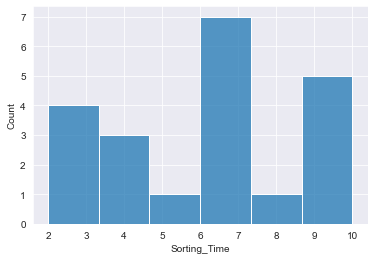

In [31]:
sns.histplot(data.Sorting_Time)

In [69]:
#Building a regression model
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time", data=data).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

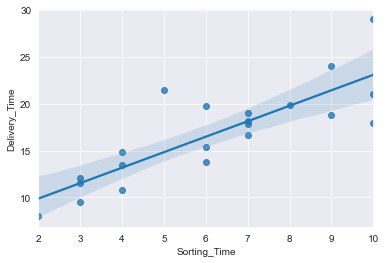

In [70]:
sns.regplot(x = 'Sorting_Time', y = 'Delivery_Time', data = data)

In [71]:
#Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [72]:
#t and p-values
print(model.pvalues, '\n', model.tvalues)

Intercept       0.001147
Sorting_Time    0.000004
dtype: float64 
 Intercept       3.823349
Sorting_Time    6.387447
dtype: float64


In [73]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           3.98e-06
Time:                        18:12:15   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
pred = model.predict(data)

In [76]:
pred.corr(data.Delivery_Time)

0.8259972607955325

In [77]:
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

Text(0, 0.5, 'Delivery Time')

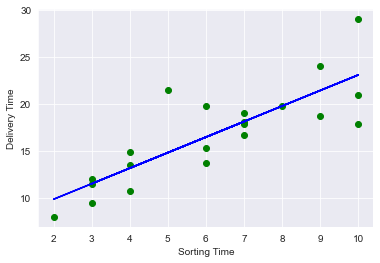

In [78]:
plt.scatter(x = data['Sorting_Time'], y = data['Delivery_Time'], color = 'green')
plt.plot(data['Sorting_Time'], pred, color = 'blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [42]:
#Building model using logarithmic transformed data
import numpy as np
model1 = smf.ols('Delivery_Time~np.log(Sorting_Time)', data = data).fit()

In [43]:
model1.params

Intercept               1.159684
np.log(Sorting_Time)    9.043413
dtype: float64

In [44]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 04 Apr 2021   Prob (F-statistic):           2.64e-06
Time:                        17:25:40   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
pred1 = model1.predict(data)

In [46]:
pred1.corr(data.Delivery_Time)

0.8339325279256244

In [47]:
pred1.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

Text(0, 0.5, 'Delivery Time')

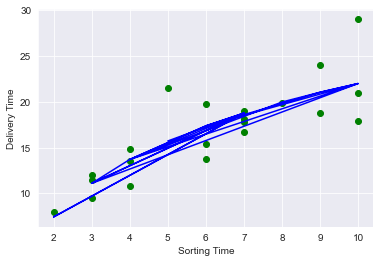

In [49]:
plt.scatter(x = data['Sorting_Time'], y = data['Delivery_Time'], color = 'green')
plt.plot(data['Sorting_Time'], pred1, color = 'blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

In [59]:
#Building the model on exponential transformation
model2 = smf.ols('np.log(Delivery_Time)~Sorting_Time', data = data).fit()

In [60]:
model2.params

Intercept       2.121372
Sorting_Time    0.105552
dtype: float64

In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 04 Apr 2021   Prob (F-statistic):           1.59e-06
Time:                           17:37:56   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
pred2 = model2.predict(data)

In [63]:
pred2.head()

0    3.176888
1    2.543578
2    2.754681
3    3.071336
4    3.176888
dtype: float64

In [64]:
# As we have used log(Delivery_Time) in preparing model so we need to convert it back
pred2 = np.exp(pred2)

In [65]:
pred2.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

In [66]:
pred2.corr(data.Delivery_Time)

0.8085780108289262

***So we will consider the model having the highest R-squared value which is the expoential transformation that is model2***